## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
kchouse = pd.read_csv('data/kc_house_data.csv')
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
kchouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [2]:
kc_new = kchouse.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
kc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [10]:
#### doing an initial model of unpreprocessed df just for funsies ####
outcome = 'price'
predictors = kchouse.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kchouse).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     66.25
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:34:39   Log-Likelihood:            -2.1378e+05
No. Observations:               15762   AIC:                         4.289e+05
Df Residuals:                   15095   BIC:                         4.340e+05
Df Model:                         666                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.505e+06   3.38e+06      1.333      0.182   -2.12e+06    1.11e+07
date[T.1/12/2015]        1.174e+05   1.95e+05      0.602      0.547   -2.65e+05       5e+05
date[T.1/13/2015]        1.074e+05   1.95e+05      0.551      0.582   -2.75e+05     4.9e+05
date[T.1/14/2015]        4.845e+04   1.94e+05      0.249      0.803   -3.32e+05    4.29e+05
date[T.1/15/2015]        9.827e+04   1.95e+05      0.504      0.614   -2.84e+05     4.8e+05
date[T.1/16/2015]        6.333e+04   1.95e+05      0.325      0.745   -3.18e+05    4.45e+05
date[T.1/17/2015]        8.599e+04   2.72e+05      0.316      0.752   -4.47e+05    6.19e+05
date[T.1/19/2015]        7116.2888   2.06e+05      0.035      0.972   -3.96e+05     4.1e+05
date[T.1/2/2015]         1.058e+05   1.95e+05      0.543      0.587   -2.76e+05    4.88e+05
date[T.1/20/2015]        1.263e+05   1.95e+05      0.648      0.517   -2.56e+05    5.08e+05
date[T.1/21/2015]         1.23e+05   1.94e+05      0.634      0.526   -2.57e+05    5.03e+05
date[T.1/22/2015]        1.039e+05   1.95e+05      0.533      0.594   -2.78e+05    4.86e+05
date[T.1/23/2015]        1.254e+05   1.95e+05      0.645      0.519   -2.56e+05    5.07e+05
date[T.1/24/2015]       -1.106e+05   2.36e+05     -0.468      0.639   -5.74e+05    3.52e+05
date[T.1/25/2015]        1.162e+05   2.36e+05      0.493      0.622   -3.46e+05    5.78e+05
date[T.1/26/2015]         4.91e+04   1.95e+05      0.252      0.801   -3.33e+05    4.31e+05
date[T.1/27/2015]        1.062e+05   1.95e+05      0.546      0.585   -2.75e+05    4.88e+05
date[T.1/28/2015]        1.053e+05   1.94e+05      0.543      0.587   -2.75e+05    4.86e+05
date[T.1/29/2015]        1.227e+05   1.95e+05      0.629      0.529    -2.6e+05    5.05e+05
date[T.1/30/2015]        2.423e+05   1.96e+05      1.237      0.216   -1.42e+05    6.26e+05
date[T.1/31/2015]          -0.0119      0.030     -0.395      0.693      -0.071       0.047
date[T.1/5/2015]         1.014e+05   1.94e+05      0.522      0.602   -2.79e+05    4.82e+05
date[T.1/6/2015]         1.149e+05   1.95e+05      0.588      0.557   -2.68e+05    4.98e+05
date[T.1/7/2015]         1.627e+05   1.95e+05      0.835      0.404   -2.19e+05    5.44e+05
date[T.1/8/2015]         7.695e+04   1.95e+05      0.395      0.693   -3.05e+05    4.59e+05
date[T.1/9/2015]         1.506e+05   1.96e+05      0.769      0.442   -2.33e+05    5.35e+05
date[T.10/1/2014]        1.383e+05   1.94e+05      0.714      0.475   -2.41e+05    5.18e+05
date[T.10/10/2014]       8.945e+04   1.94e+05      0.462      0.644    -2.9e+05    4.69e+05
date[T.10/11/2014]       1.117e+06   2.35e+05      4.746      0.000    6.56e+05    1.58e+06
date[T.10/12/2014]       1.533e+05   2.35e+05      0.652      0.515   -3.08e+05    6.14e+05
date[T.10/13/2014]       6.491e+04   1.95e+05  

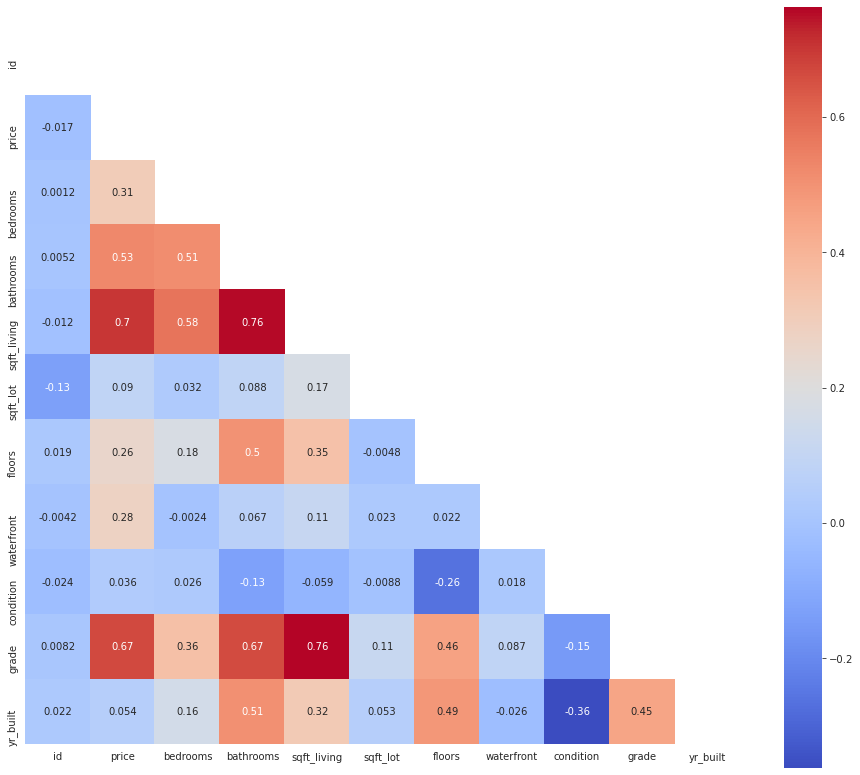

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = kc_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(16, 14))

    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap = 'coolwarm')

In [5]:
df = kc_new.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [6]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(sqft_living, bathrooms)",0.755758


In [86]:
#decision if/which column to drop
kc_new.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [ ]:
#some notes: # Mean price is $540,296.57 
             # std $367368.14
             # min $78,000.0 
             # 25% $322,000.0
             # 50% $450,000.0,
             # 75% $645000.0
             # max $7,700,000.0

In [11]:
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False        False     False   False       False      False  False       21420
dtype: int64

In [12]:
kc_new['waterfront'] = kc_new['waterfront'].fillna(0.0)
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False        False     False   False       False      False  False       21420
dtype: int64

In [13]:
kc_new['id'].value_counts()
kc_new.drop_duplicates(subset = 'id', inplace = True)
kc_new

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004


In [ ]:
### big ol scatter matrix to discern between continuous/categorical variables

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='price', ylabel='id'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='id'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='id'>,
        <AxesSubplot:xlabel='floors', ylabel='id'>,
        <AxesSubplot:xlabel='waterfront', ylabel='id'>,
        <AxesSubplot:xlabel='condition', ylabel='id'>,
        <AxesSubplot:xlabel='grade', ylabel='id'>,
        <AxesSubplot:xlabel='yr_built', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot

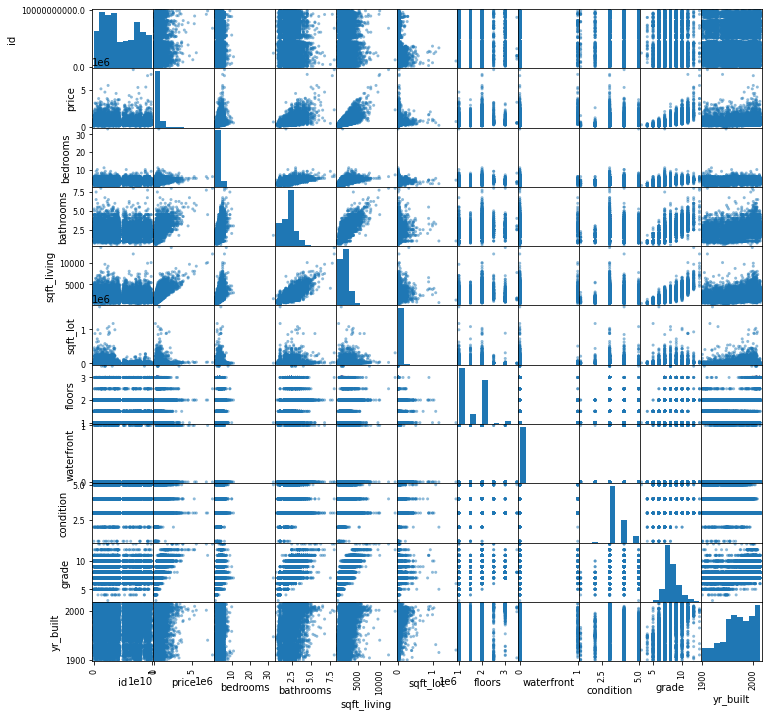

In [14]:
pd.plotting.scatter_matrix(kc_new, figsize=[12,12])

In [ ]:
### Check for outliers ###

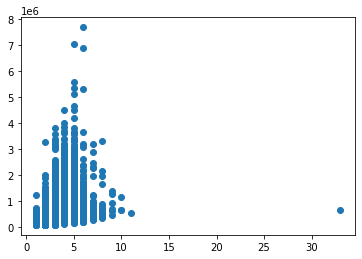

In [90]:
plt.scatter(x = kc_new['bedrooms'], y = kc_new['price'])


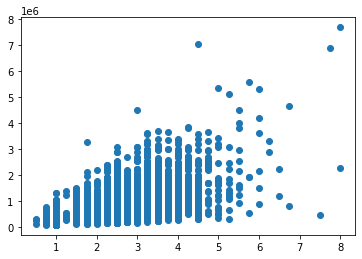

In [67]:
plt.scatter(x = kc_new['bathrooms'], y = kc_new['price'])


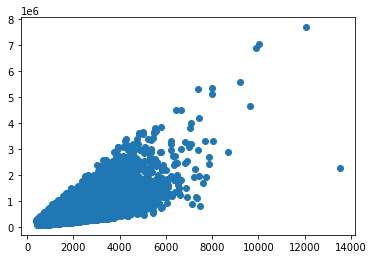

In [66]:
plt.scatter(x = kc_new['sqft_living'], y = kc_new['price'])

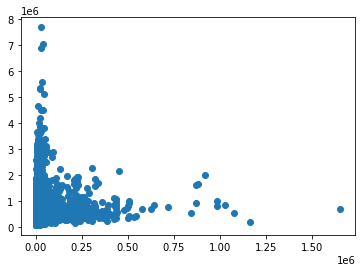

In [65]:
plt.scatter(x = kc_new['sqft_lot'], y = kc_new['price'])


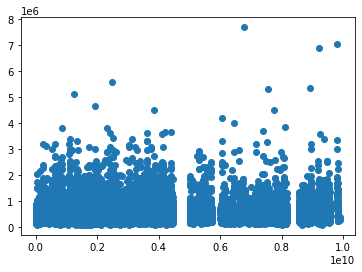

In [64]:
plt.scatter(x = kc_new['id'], y = kc_new['price'])


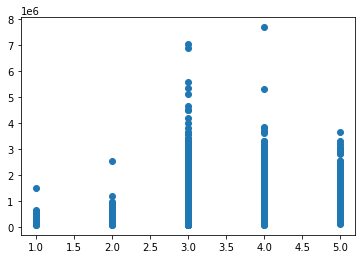

In [68]:
plt.scatter(x = kc_new['condition'], y = kc_new['price'])

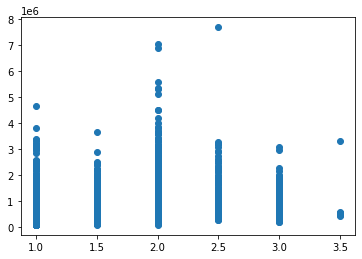

In [69]:
plt.scatter(x = kc_new['floors'], y = kc_new['price'])


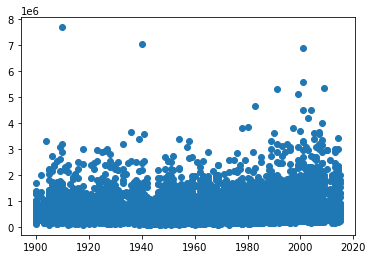

In [71]:
plt.scatter(x = kc_new['yr_built'], y = kc_new['price'])


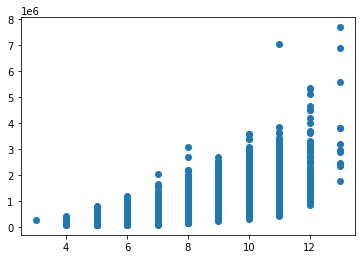

In [91]:
plt.scatter(x = kc_new['grade'], y = kc_new['price'])


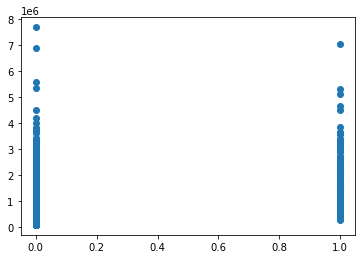

In [92]:
plt.scatter(x = kc_new['waterfront'], y = kc_new['price'])

In [17]:
continuous = ['price', 'sqft_lot', 'sqft_living']
categoricals = ['waterfront', 'id', 'condition', 'grade',  'yr_built', 'floors', 'bedrooms', 'bathrooms']
kccat = kc_new[categoricals]
kccon = kc_new[continuous]

In [18]:
kccon = kccon.set_index(kc_new['id'])

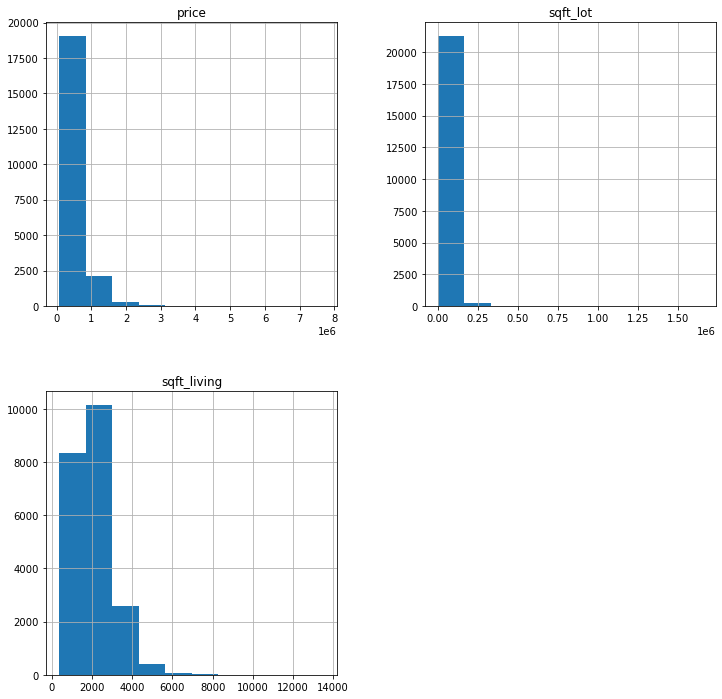

In [25]:
kccon.hist(figsize = [12,12]);

In [7]:
z = np.abs(stats.zscore(kc_new))
z

threshold = 3
print(np.where(z >= 3))

kc_new_out = kc_new[(z<=3).all(axis = 1)]
kc_new_out

(array([    5,     5,    21, ..., 21384, 21384, 21397], dtype=int64), array([3, 4, 1, ..., 4, 7, 4], dtype=int64))


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004


In [15]:
#### doing an initial model of unpreprocessed df just for funsies ####
from statsmodels.formula.api import ols
import scipy.stats as stats
outcome = 'price'
predictors = kc_new.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3908.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:45:00   Log-Likelihood:            -2.9378e+05
No. Observations:               21420   AIC:                         5.876e+05
Df Residuals:                   21409   BIC:                         5.877e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.688e+06    1.3e+05     51.280      0.000    6.43e+06    6.94e+06
id          -1.552e-06   5.25e-07     -2.955      0.003   -2.58e-06   -5.23e-07
bedrooms    -4.296e+04   2064.444    -20.808      0.000    -4.7e+04   -3.89e+04
bathrooms    5.152e+04   3472.880     14.835      0.000    4.47e+04    5.83e+04
sqft_living   176.9585      3.315     53.380      0.000     170.461     183.456
sqft_lot       -0.2569      0.037     -6.909      0.000      -0.330      -0.184
floors        2.11e+04   3474.091      6.074      0.000    1.43e+04    2.79e+04
waterfront    7.55e+05   1.84e+04     41.078      0.000    7.19e+05    7.91e+05
condition    1.933e+04   2507.177      7.710      0.000    1.44e+04    2.42e+04
grade        1.304e+05   2167.181     60.167      0.000    1.26e+05    1.35e+05
yr_built    -3840.9998     67.041    -57.293      0.000   -3972.406   -3709.594
==============================================================================
Omnibus:                    15771.211   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1013819.083
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      36.184   Cond. No.                     4.72e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
kc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  float64
 8   condition    21420 non-null  int64  
 9   grade        21420 non-null  int64  
 10  yr_built     21420 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.6 MB


In [19]:
# log and normalize features
log_names = [f'{column}_log' for column in kccon.columns]

kccon_log = np.log(kccon)
kccon_log.columns = log_names

log_names

['price_log', 'sqft_lot_log', 'sqft_living_log']

In [20]:
kccon_log

,price_log,sqft_lot_log,sqft_living_log
id,,,
7129300520,12.309982,8.639411,7.073270
6414100192,13.195614,8.887653,7.851661
5631500400,12.100712,9.210340,6.646391
2487200875,13.311329,8.517193,7.580700
1954400510,13.142166,8.997147,7.426549
...,...,...,...
263000018,12.793859,7.030857,7.333023
6600060120,12.899220,8.667852,7.745003
1523300141,12.904459,7.207860,6.927558


In [21]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_log_norm = kccon_log.apply(normalize)

array([[<AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>],
       [<AxesSubplot:title={'center':'sqft_living_log'}>, <AxesSubplot:>]],
      dtype=object)

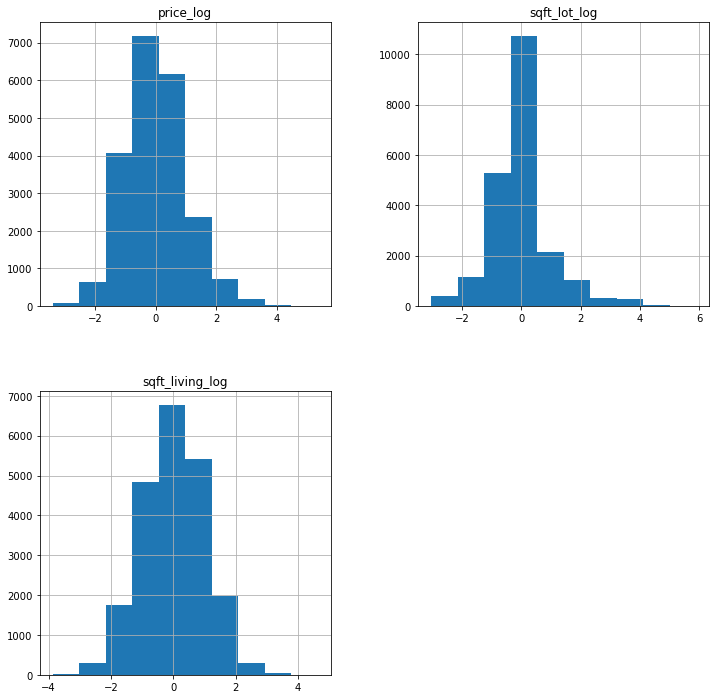

In [22]:
kc_log_norm.hist(figsize = [12,12])

In [ ]:
### check features with statsmodels ###

# OLS with Statsmodels #

In [23]:
Y = kc_log_norm['price_log']
X = kc_log_norm.drop(['price_log'], axis = 1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

### OLS Regression Results for continuous variables ####

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     9231.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:47:08   Log-Likelihood:                -23735.
No. Observations:               21420   AIC:                         4.748e+04
Df Residuals:                   21417   BIC:                         4.750e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.208e-15      0.005  -6.41e-13      1.000      -0.010       0.010
sqft_lot_log       -0.0918      0.005    -17.323      0.000      -0.102      -0.081
sqft_living_log     0.7048      0.005    133.024      0.000       0.694       0.715
==============================================================================
Omnibus:                       93.148   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.864
Skew:                           0.142   Prob(JB):                     1.86e-20
Kurtosis:                       2.854   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
### scikit linear regression with test/train ####

In [24]:
X_train = kc_log_norm.drop(['price_log'], axis = 1)
y_train = kc_log_norm['price_log']

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, cross_validate

baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

model_scores = cross_validate(
    estimator=baseline_model,
    X=X,
    y=Y,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", model_scores["train_score"].mean())
print("Validation score:", model_scores["test_score"].mean())


Current Model
Train score:      0.4620365862322198
Validation score: 0.46554000356798475


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
X = X_train
x_cols = ['price_log', 'sqft_lot_log', 'sqft_living_log',]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('price_log', 1.119585717098445), ('sqft_lot_log', 1.1195857170984442)]

In [ ]:
#### in the end, there is no significant difference between the Rsquared
#### values with or without bathroom #

# ------------ Categorical -------------- #

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

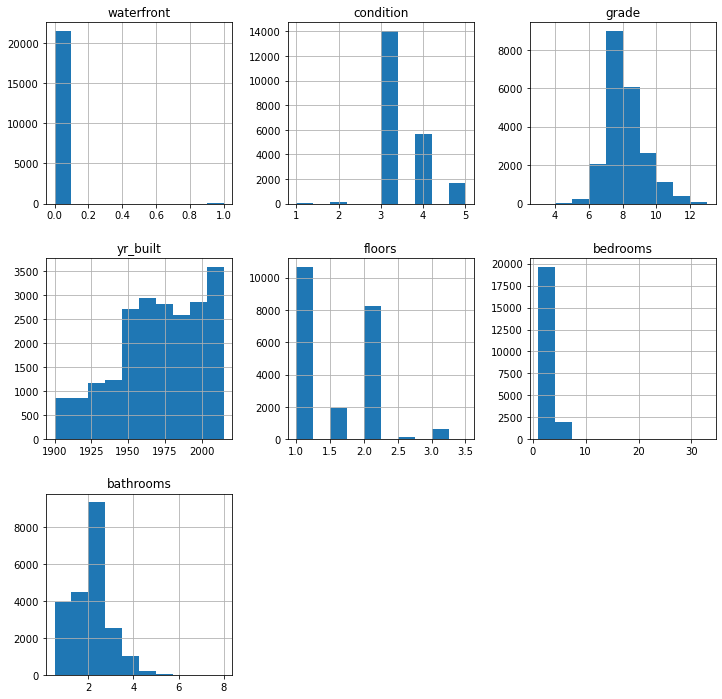

In [136]:
kccat.hist(figsize = [12,12])

In [80]:
kccat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  21420 non-null  float64
 1   id          21420 non-null  int64  
 2   condition   21420 non-null  int64  
 3   grade       21420 non-null  int64  
 4   yr_built    21420 non-null  int64  
 5   floors      21420 non-null  float64
 6   bedrooms    21420 non-null  int64  
 7   bathrooms   21420 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.5 MB


In [ ]:
#turn the n/a columns into 0's because it esssentially means the same thing,
#

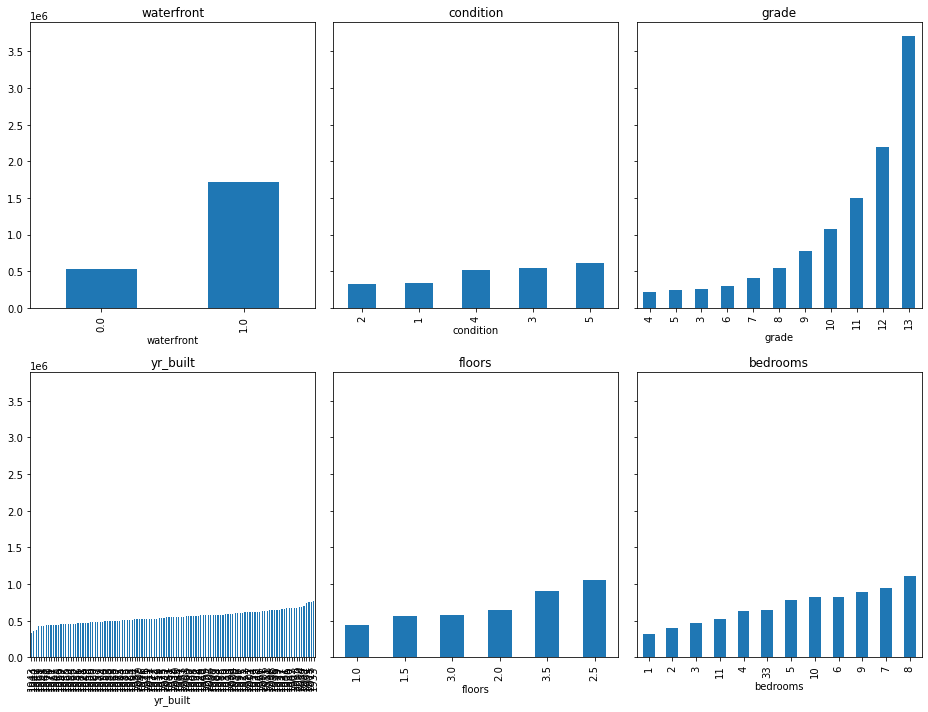

In [137]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13,10), sharey=True)

categoricals = ['waterfront', 'condition', 'grade',  'yr_built', 'floors', 'bedrooms', 'bathrooms']

for col, ax in zip(categoricals, axes.flatten()):
    (kc_new.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [29]:
kccat['yr_built'].describe()

count    21420.000000
mean      1971.092997
std         29.387141
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [ ]:
# decided to feature engineer the yr built to decrease number of OHE columns,
# categorize by decade 

In [28]:
kccat['condition'] = kccat['condition'].astype(str)
kccat['waterfront'] = kccat['waterfront'].astype(str)
kccat['grade'] = kccat['grade'].astype(str)
kccat['floors'] = kccat['floors'].astype(str)
kccat['yr_built'] = kccat['yr_built'].astype(int)
kccat['bedrooms'] = kccat['bedrooms'].astype(str)
kccat['bathrooms'] = kccat['bathrooms'].astype(str)

<ipython-input-28-2b8e0db247c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kccat['condition'] = kccat['condition'].astype(str)
<ipython-input-28-2b8e0db247c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kccat['waterfront'] = kccat['waterfront'].astype(str)
<ipython-input-28-2b8e0db247c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [30]:
df = kccat[['yr_built', 'id']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   yr_built  21420 non-null  int64
 1   id        21420 non-null  int64
dtypes: int64(2)
memory usage: 502.0 KB


In [31]:
_1900s = df.loc[(df['yr_built'] >= 1900) & (df['yr_built'] <= 1909)]
_1910s = df.loc[(df['yr_built'] >= 1910) & (df['yr_built'] <= 1919)]
_1920s = df.loc[(df['yr_built'] >= 1920) & (df['yr_built'] <= 1929)]
_1930s = df.loc[(df['yr_built'] >= 1930) & (df['yr_built'] <= 1939)]
_1940s = df.loc[(df['yr_built'] >= 1940) & (df['yr_built'] <= 1949)]
_1950s = df.loc[(df['yr_built'] >= 1950) & (df['yr_built'] <= 1959)]
_1960s = df.loc[(df['yr_built'] >= 1960) & (df['yr_built'] <= 1969)]
_1970s = df.loc[(df['yr_built'] >= 1970) & (df['yr_built'] <= 1979)]
_1980s = df.loc[(df['yr_built'] >= 1980) & (df['yr_built'] <= 1989)]
_1990s = df.loc[(df['yr_built'] >= 1990) & (df['yr_built'] <= 1999)]
_2000s = df.loc[(df['yr_built'] >= 2000) & (df['yr_built'] <= 2009)]
_2010s = df.loc[(df['yr_built'] >= 2010) & (df['yr_built'] <= 2019)]

In [32]:
len(_1900s) + len(_1910s) + len(_1920s) + len(_1930s) + len(_1940s) + len(_1950s) + len(_1960s) + len(_1970s) + len(_1980s) + len(_1990s) + len(_2000s) + len(_2010s)

21420

In [33]:
def newcol(df):
    df[print(df)] = ['1'] * len(df)

newcol(_1900s)
newcol(_1910s)
newcol(_1920s)
newcol(_1930s)
newcol(_1940s)
newcol(_1950s)
newcol(_1960s)
newcol(_1970s)
newcol(_1980s)
newcol(_1990s)
newcol(_2000s)
newcol(_2010s)

       yr_built          id
14         1900  1175000570
27         1909  3303700376
37         1904  2768000400
111        1905  3362400511
115        1900  3626039325
...         ...         ...
19307      1905  3362400650
19370      1900  2420069042
19464      1904  2397101460
19523      1906  7950302150
19582      1900  7518507685

[641 rows x 2 columns]
       yr_built          id
17         1916  6865200140
26         1915  1794500383
72         1916  8820901275
100        1910  1952200240
125        1914  4389200955
...         ...         ...
19510      1910  7011201325
19542      1910  6169901095
19543      1910  4443800375
19544      1912  9376301800
20567      1910  9151600055

[798 rows x 2 columns]
       yr_built          id
12         1927   114101516
18         1921    16000397
32         1929   461000390
33         1929  7589200193
43         1922  9270200160
...         ...         ...
19570      1925  3204300610
19588      1928  7518504130
20001      1928  1025039168


<ipython-input-33-ab32c839b2c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[print(df)] = ['1'] * len(df)
<ipython-input-33-ab32c839b2c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[print(df)] = ['1'] * len(df)
<ipython-input-33-ab32c839b2c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [34]:
_1900s.columns = ['yr_built', 'id', '1900-1909']
_1910s.columns = ['yr_built', 'id', '1910-1919']
_1920s.columns = ['yr_built', 'id', '1920-1929']
_1930s.columns = ['yr_built', 'id', '1930-1939']
_1940s.columns = ['yr_built', 'id', '1940-1949']
_1950s.columns = ['yr_built', 'id', '1950-1959']
_1960s.columns = ['yr_built', 'id', '1960-1969']
_1970s.columns = ['yr_built', 'id', '1970-1979']
_1980s.columns = ['yr_built', 'id', '1980-1989']
_1990s.columns = ['yr_built', 'id', '1990-1999']
_2000s.columns = ['yr_built', 'id', '2000-2009']
_2010s.columns = ['yr_built', 'id', '2010-2019']

In [35]:
by_decade_ohe = pd.concat([_1900s,_1910s, _1920s, _1930s, _1940s, _1950s, _1960s, _1970s, _1980s, _1990s, _2000s, _2010s])
by_decade_ohe.index = by_decade_ohe.index.sort_values()
by_decade_ohe = by_decade_ohe.fillna(0)
by_decade_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   yr_built   21420 non-null  int64 
 1   id         21420 non-null  int64 
 2   1900-1909  21420 non-null  object
 3   1910-1919  21420 non-null  object
 4   1920-1929  21420 non-null  object
 5   1930-1939  21420 non-null  object
 6   1940-1949  21420 non-null  object
 7   1950-1959  21420 non-null  object
 8   1960-1969  21420 non-null  object
 9   1970-1979  21420 non-null  object
 10  1980-1989  21420 non-null  object
 11  1990-1999  21420 non-null  object
 12  2000-2009  21420 non-null  object
 13  2010-2019  21420 non-null  object
dtypes: int64(2), object(12)
memory usage: 2.5+ MB


In [36]:
by_decade_ohe.columns

Index(['yr_built', 'id', '1900-1909', '1910-1919', '1920-1929', '1930-1939',
       '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
       '1990-1999', '2000-2009', '2010-2019'],
      dtype='object')

In [ ]:
yr_ohe = pd.get_dummies(by_decade_ohe, prefix = ['1900-1909', '1910-1919', '1920-1929', '1930-1939',
       '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
       '1990-1999', '2000-2009', '2010-2019'])

In [73]:
condition_ohe = pd.get_dummies(kccat['condition'], prefix = 'condition', drop_first=True)
waterfront_ohe =pd.get_dummies(kccat['waterfront'], prefix = 'waterfront', drop_first=True)
grade_ohe= pd.get_dummies(kccat['grade'], prefix = 'grade', drop_first=True)
floors_ohe = pd.get_dummies(kccat['floors'], prefix = 'floors', drop_first=True)
bed_ohe = pd.get_dummies(kccat['bedrooms'], prefix = 'bedrooms', drop_first=True)
bath_ohe = pd.get_dummies(kccat['bathrooms'], prefix = 'bathrooms', drop_first=True)


In [131]:
kccat['yr_built'] = kccat['yr_built'].astype(str)
kccat['id'] = kccat['id'].astype(str)


In [134]:
kccat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  21420 non-null  float64
 1   id          21420 non-null  object 
 2   condition   21420 non-null  int64  
 3   grade       21420 non-null  int64  
 4   yr_built    21420 non-null  object 
 5   floors      21420 non-null  float64
 6   bedrooms    21420 non-null  int64  
 7   bathrooms   21420 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB


In [ ]:
l1900s = []
for x in kccat['yr_built']:
    if x.startswith('190'):
        l1900s.append(kccat['id'[0]])
l1900s

In [161]:
kccat = kccat.set_index(kc_new['id'])

,waterfront,id,condition,grade,yr_built,floors,bedrooms,bathrooms
id,,,,,,,,
7129300520,0.0,7129300520,3,7,1955,1.0,3,1.00
6414100192,0.0,6414100192,3,7,1951,2.0,3,2.25
5631500400,0.0,5631500400,3,6,1933,1.0,2,1.00
2487200875,0.0,2487200875,5,7,1965,1.0,4,3.00
1954400510,0.0,1954400510,3,8,1987,1.0,3,2.00
...,...,...,...,...,...,...,...,...
263000018,0.0,263000018,3,8,2009,3.0,3,2.50
6600060120,0.0,6600060120,3,8,2014,2.0,4,2.50
1523300141,0.0,1523300141,3,7,2009,2.0,2,0.75


In [65]:
ohe_concat = pd.concat([condition_ohe, waterfront_ohe, grade_ohe, floors_ohe, bed_ohe], axis = 1)

In [66]:
all_ohe = pd.concat([ohe_concat, by_decade_ohe], axis = 1)
all_ohe

,condition_2,condition_3,condition_4,condition_5,waterfront_1.0,grade_4,grade_5,grade_6,grade_7,grade_8,...,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
21593,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
21594,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
21595,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
print(kc_log_norm.shape)
print(all_ohe.shape)

(21420, 3)
(21420, 44)


In [60]:
kc_log_norm.index.is_unique

True

In [56]:
kc_log_norm

,price_log,sqft_lot_log,sqft_living_log
0,-1.402879,-0.387524,-1.129304
1,0.278512,-0.112876,0.706321
2,-1.800182,0.244137,-2.135982
3,0.498200,-0.522743,0.067332
4,0.177040,0.008266,-0.296190
...,...,...,...
21592,-0.484228,-2.167185,-0.516746
21593,-0.284199,-0.356058,0.454796
21594,-0.274253,-1.971354,-1.472925
21595,-0.284199,-1.340332,-0.411249


In [59]:
all_ohe.index.is_unique

True

In [179]:
all_ohe

,condition_2,condition_3,condition_4,condition_5,waterfront_1.0,grade_4,grade_5,grade_6,grade_7,grade_8,...,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
21593,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
21594,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
21595,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [67]:
preprocessed = pd.merge(all_ohe,kc_log_norm,how='outer',indicator=True, right_index = True, left_index = True)
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42840 entries, 0 to 9900000190
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   condition_2      21420 non-null  float64 
 1   condition_3      21420 non-null  float64 
 2   condition_4      21420 non-null  float64 
 3   condition_5      21420 non-null  float64 
 4   waterfront_1.0   21420 non-null  float64 
 5   grade_4          21420 non-null  float64 
 6   grade_5          21420 non-null  float64 
 7   grade_6          21420 non-null  float64 
 8   grade_7          21420 non-null  float64 
 9   grade_8          21420 non-null  float64 
 10  grade_9          21420 non-null  float64 
 11  grade_10         21420 non-null  float64 
 12  grade_11         21420 non-null  float64 
 13  grade_12         21420 non-null  float64 
 14  grade_13         21420 non-null  float64 
 15  floors_1.5       21420 non-null  float64 
 16  floors_2.0       21420 non-null  fl

In [142]:
preprocessed.isnull().value_counts()

condition_2  condition_3  condition_4  condition_5  waterfront_1_0  grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  floors_1_5  floors_2_0  floors_2_5  floors_3_0  floors_3_5  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  bedrooms_11  bedrooms_33  yr_built  id     built between 1900-1909  built between 1910-1919  built between 1920-1929  built between 1930-1939  built between 1940-1949  built between 1950-1959  built between 1960-1969  built between 1970-1979  built between 1980-1989  built between 1990-1999  built between 2000-2009  built between 2010-2019  price_log  sqft_lot_log  sqft_living_log  _merge
False        False        False        False        False           False    False    False    False    False    False    False     False     False     False     False       False       False       False       False       False       False       False       False       False  

In [68]:
preprocessed = preprocessed.drop('_merge', axis = 1)

In [69]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42840 entries, 0 to 9900000190
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   condition_2      21420 non-null  float64
 1   condition_3      21420 non-null  float64
 2   condition_4      21420 non-null  float64
 3   condition_5      21420 non-null  float64
 4   waterfront_1.0   21420 non-null  float64
 5   grade_4          21420 non-null  float64
 6   grade_5          21420 non-null  float64
 7   grade_6          21420 non-null  float64
 8   grade_7          21420 non-null  float64
 9   grade_8          21420 non-null  float64
 10  grade_9          21420 non-null  float64
 11  grade_10         21420 non-null  float64
 12  grade_11         21420 non-null  float64
 13  grade_12         21420 non-null  float64
 14  grade_13         21420 non-null  float64
 15  floors_1.5       21420 non-null  float64
 16  floors_2.0       21420 non-null  float64
 17  floors_

In [70]:
preprocessed.columns = preprocessed.columns.str.replace('.','_')

In [224]:
preprocessed[['1900-1909', '1910-1919', '1920-1929', '1930-1939',
       '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
       '1990-1999', '2000-2009', '2010-2019']] = preprocessed[['1900-1909', 
        '1910-1919', '1920-1929', '1930-1939',
       '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
       '1990-1999', '2000-2009', '2010-2019']].astype(float)

In [ ]:
preprocessed[continuous]

In [71]:
outcome = 'price_log'
predictors = preprocessed.drop('price_log', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula = formula, data = preprocessed).fit()
model.summary()

PatsyError: numbers besides '0' and '1' are only allowed with **
    price_log~condition_2+condition_3+condition_4+condition_5+waterfront_1_0+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+floors_1_5+floors_2_0+floors_2_5+floors_3_0+floors_3_5+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5+bedrooms_6+bedrooms_7+bedrooms_8+bedrooms_9+bedrooms_10+bedrooms_11+bedrooms_33+yr_built+id+1900-1909+1910-1919+1920-1929+1930-1939+1940-1949+1950-1959+1960-1969+1970-1979+1980-1989+1990-1999+2000-2009+2010-2019+sqft_lot_log+sqft_living_log
                                                                                                                                                                                                                                                                                                                                                                ^^^^

In [264]:
X = preprocessed.drop('price_log', axis = 1)
y = preprocessed['price_log']
model = sm.OLS(y,X).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16065 5355 16065 5355


In [253]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6084657637041938
Validation score: 0.6042948762494464


In [239]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

AttributeError: 'OLS' object has no attribute 'resid'

In [158]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [241]:
X = X_train
y = y_train

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  grade_6                        with p-value 0.0
Add  grade_7                        with p-value 0.0
Add  sqft_living_log                with p-value 0.0
Add  grade_8                        with p-value 2.00647e-172
Add  grade_5                        with p-value 1.39546e-107
Add  grade_9                        with p-value 7.14171e-109
Add  waterfront_1_0                 with p-value 4.59863e-95
Add  floors_1_5                     with p-value 6.05419e-81
Add  bedrooms_2                     with p-value 5.97853e-75
Add  condition_5                    with p-value 1.10453e-66
Add  grade_4                        with p-value 1.67001e-40
Add  grade_10                       with p-value 1.86747e-37
Add  condition_4                    with p-value 3.14004e-38
Add  sqft_lot_log                   with p-value 1.88e-44
Add  floors_2_0                     with p-value 1.12387e-37
Add  grade_11                       with p-value 1.75835e-11
Add  2010-2019                      with p-value

In [242]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     991.9
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:58:29   Log-Likelihood:                -15395.
No. Observations:               16065   AIC:                         3.084e+04
Df Residuals:                   16039   BIC:                         3.104e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1114      0.053      2.119      0.034       0.008       0.215
grade_6            -0.3449      0.020    -17.640      0.000      -0.383      -0.307
sqft_living_log     0.4439      0.010     45.672      0.000       0.425       0.463
grade_8             0.3893      0.013     28.853      0.000       0.363       0.416
grade_5            -0.5800      0.049    -11.731      0.000      -0.677      -0.483
grade_9             0.8756      0.020     44.167      0.000       0.837       0.914
waterfront_1_0      1.1853      0.060     19.703      0.000       1.067       1.303
floors_1_5          0.2774      0.018     15.111      0.000       0.241       0.313
condition_5         0.3584      0.019     18.503      0.000       0.320       0.396
grade_4            -0.6464      0.141     -4.585      0.000      -0.923      -0.370
grade_10            1.3171      0.028     47.828      0.000       1.263       1.371
condition_4         0.1435      0.012     11.796      0.000       0.120       0.167
sqft_lot_log       -0.0945      0.006    -16.423      0.000      -0.106      -0.083
floors_2_0         -0.1569      0.013    -12.136      0.000      -0.182      -0.132
grade_11            1.7231      0.042     41.138      0.000       1.641       1.805
2010-2019          -0.0929      0.023     -4.104      0.000      -0.137      -0.049
bedrooms_4         -0.4996      0.053     -9.451      0.000      -0.603      -0.396
bedrooms_3         -0.4603      0.051     -8.939      0.000      -0.561      -0.359
bedrooms_5         -0.4468      0.056     -7.976      0.000      -0.557      -0.337
bedrooms_6         -0.4352      0.070     -6.221      0.000      -0.572      -0.298
grade_13            2.8608      0.193     14.823      0.000       2.483       3.239
grade_12            2.1745      0.081     26.738      0.000       2.015       2.334
bedrooms_7         -0.5047      0.121     -4.163      0.000      -0.742      -0.267
condition_2        -0.1922      0.060     -3.207      0.001      -0.310      -0.075
bedrooms_2         -0.1440      0.052     -2.788      0.005      -0.245      -0.043
1900-1909          -0.0794      0.030     -2.671      0.008      -0.138      -0.021
==============================================================================
Omnibus:                       10.061   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.508
Skew:                           0.038   Prob(JB):                      0.00523
Kurtosis:                       3.099   Cond. No.                         51.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_with_intercept,
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6090478146955609
Validation score: 0.5987519835149683


# Stepwise Feature Selection with Scikit #

In [244]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 50)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [245]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression()

In [246]:
yhat = linreg.predict(X[selected_columns])

In [247]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [248]:
r_squared

0.6079049197001052

In [249]:
adjusted_r_squared

0.606754362868358